# Desafío - Árboles de regresión
- Para realizar este desafío debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
    - El desafío se debe desarrollar de manera Individual.
    - Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío - Árboles de regresión.

## Requerimientos
- Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.
- Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable `Sale_Price`.

### Ejercicio 1: Preparación del ambiente de trabajo
- Importe las librerías clásicas a utilizar.
- Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la clase `DecisionTreeRegressor`.
- De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión, división de muestras y búsqueda de grilla con validación cruzada.
- Elimine la columna `Unnamed: 0` cuando cargue los datos.

In [1]:
# Utiliza esta celda para importar las librerías y el set de datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle

warnings.filterwarnings('ignore')

df = pd.read_csv('ames_housing.csv').drop('Unnamed: 0', axis=1)
df

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37,7937,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,Good_Privacy,None,0,3,2006,WD,Normal,142500,-93.604776,41.988964
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8885,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,Minimum_Privacy,None,0,6,2006,WD,Normal,131000,-93.602680,41.988314
2927,Split_Foyer,Residential_Low_Density,62,10441,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,Shed,700,7,2006,WD,Normal,132000,-93.606847,41.986510
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77,10010,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,4,2006,WD,Normal,170000,-93.600190,41.990921


In [2]:
# Exploramos si existen valores perdidos

df.isna().sum().sum()

0

**No hay datos perdidos en el dataset**

### Ejercicio 2: Feature engineering
- Identifique si el `dtype` de cada `pd.Series` en nuestra base de datos se considera `object` o no. Para todas las variables que sean `object`, realice lo siguiente:
    - Genere una recodificación $k-1$ en cada variable.
    - Para efectos prácticos sólo necesitan eliminar una de las categorías, no se concentren en especificar la categoría a eliminar.
    - Pueden utilizar la función con la opción `drop_first` para ello.
- Utilizando el método `pd.concat`, concatene a los atributos creados en la base de datos.

_**Tip**_: No se olvide de eliminar los atributos recodificados, de esta forma evitará un aumento artificial del desempeño del modelo.

In [3]:
# Utiliza esta celda para generar el DataFrame solicitado

df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,141,31770,1960,1960,112,2,0,441,1080,1656,...,0,0,0,0,1,0,0,0,1,0
1,80,11622,1961,1961,0,6,144,270,882,896,...,0,0,0,0,1,0,0,0,1,0
2,81,14267,1958,1958,108,1,0,406,1329,1329,...,0,0,0,0,1,0,0,0,1,0
3,93,11160,1968,1968,0,1,0,1045,2110,2110,...,0,0,0,0,1,0,0,0,1,0
4,74,13830,1997,1998,0,3,0,137,928,928,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37,7937,1984,1984,0,3,0,184,1003,1003,...,0,0,0,0,1,0,0,0,1,0
2926,0,8885,1983,1983,0,2,324,239,864,902,...,0,0,0,0,1,0,0,0,1,0
2927,62,10441,1992,1992,0,3,0,575,912,970,...,0,0,0,0,1,0,0,0,1,0
2928,77,10010,1974,1975,0,1,123,195,1389,1389,...,0,0,0,0,1,0,0,0,1,0


### Ejercicio 3: Primer modelo
- Genere muestras de entrenamiento y validación con `Sale_Price` como vector objetivo y los atributos de la base de datos como matriz.
- Recuerde definir el porcentaje de casos en la muestra de validación y una semilla pseudoaleatoria.
- Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento _sin modificar los hiper parámetros_.
- Reporte las principales métricas de desempeño
- Comente sobre el desempeño.

In [4]:
# Utiliza esta celda para generar los subsets de datos

y = df_dummies['Sale_Price']
X = df_dummies.drop('Sale_Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Utiliza esta celda para entrenar el modelo solicitado

arbol = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

El R2 es de: 0.7602859987831461
EL RMSE es de: 41049.38846371035
EL MAE es de: 25195.278725824803


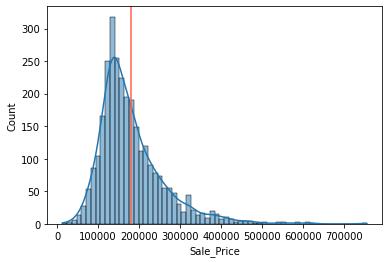

In [6]:
# Utiliza esta celda para reportar las métricas solicitadas

y_hat = arbol.predict(X_test)

print(f'El R2 es de: {r2_score(y_test,y_hat)}')
print(f'EL RMSE es de: {np.sqrt(mean_squared_error(y_test,y_hat))}')
print(f'EL MAE es de: {mean_absolute_error(y_test,y_hat)}')

# Realizamos un histgrama de nuestro vector objetivo para ver la magnitud de las métricas obtenida en comparación con los datos reales
sns.histplot(y, kde=True)
plt.axvline(y.mean(), color='tomato');

**Comentarios** 
- Tenemos un R2 de 0.76, lo cual es bastante bueno
- En terminos de RMSE y MAE, nos arrojan valores de 41049.3 y 25195.2 respectivamente, lo cual si lo comparamos con la escala de nuestra variable, vemos que son valores bastante bajos, por lo que podemos decir que el modelo arrojado es bastante bueno ya que las metricas son bajas (en comparación con la magnitudes de la variable)

### Ejercicio 4: Importancia relativa
- Implemente la función `plot_importance` utilizado en la lectura para reportar la importancia relativa de los atributos.
- Comente sobre cuáles son los principales 10 atributos que afectan la predicción de `Sale_Price`.
- Separe estos 10 atributos en una nueva base de datos, junto con el vector objetivo.

In [7]:
# Utiliza esta celda para definir la función solicitada

from lec7_graphs import plot_importance

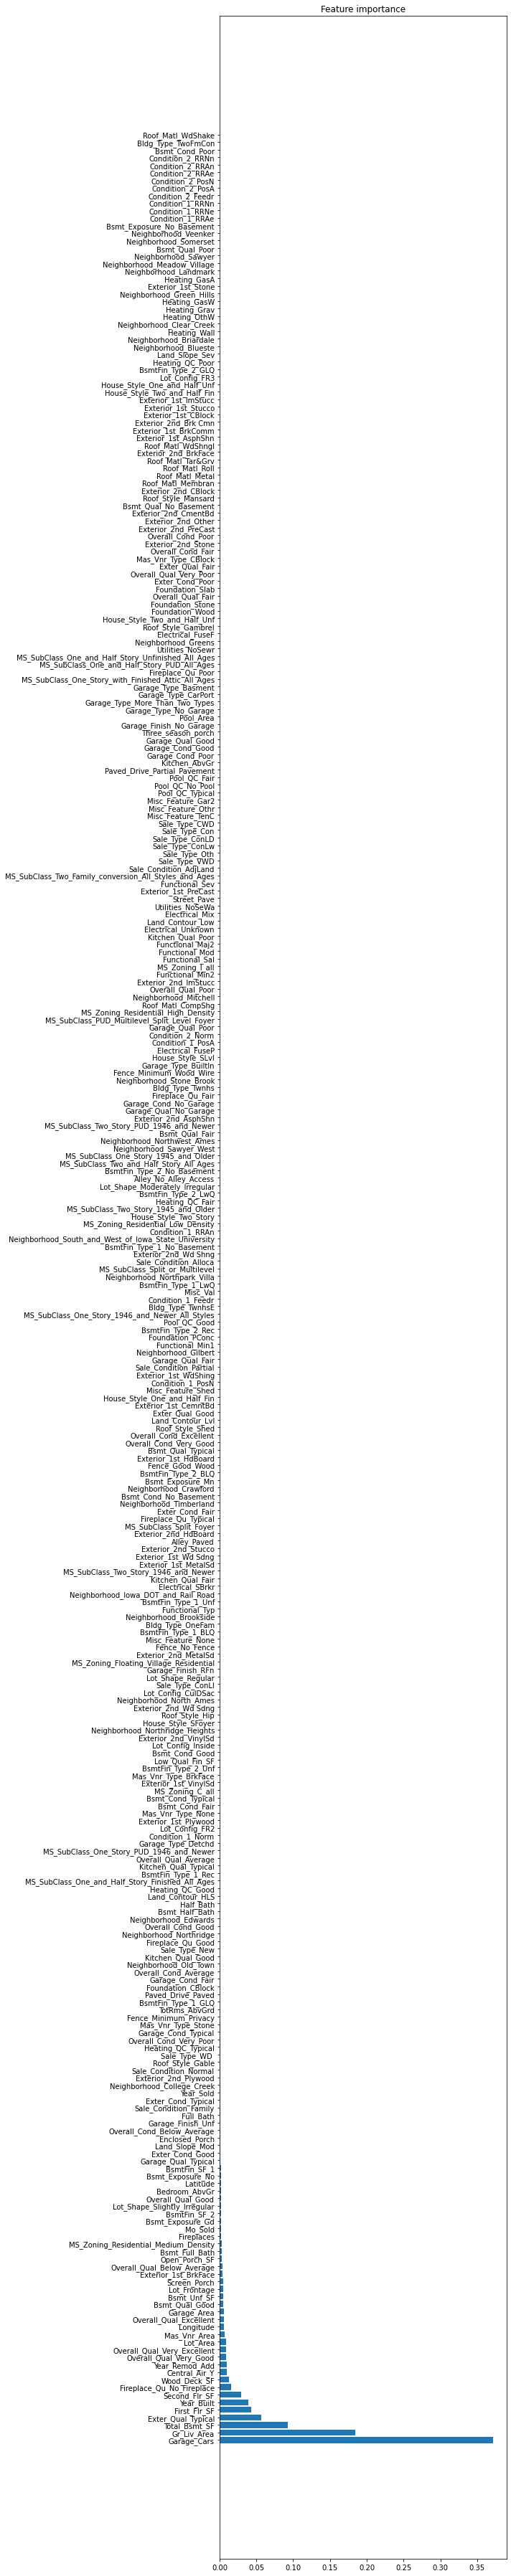

In [8]:
# Utiliza esta celda para realizar el llamado de la función

plt.figure(figsize=(10,50))
plot_importance(arbol, X_train.columns)
plt.tight_layout()

In [9]:
# Utiliza esta celda para generar el nuevo set solicitado

df_importance_all = pd.DataFrame(zip(X_train.columns,arbol.feature_importances_)).sort_values(by=1, ascending=False)
df_importance_all.columns = ['variable', 'importancia']
columnas_importantes  = df_importance_all.head(10)['variable'].values.tolist()

df_importance = df_dummies[columnas_importantes + ['Sale_Price']]
df_importance

,Garage_Cars,Gr_Liv_Area,Total_Bsmt_SF,Exter_Qual_Typical,First_Flr_SF,Year_Built,Second_Flr_SF,Fireplace_Qu_No_Fireplace,Wood_Deck_SF,Central_Air_Y,Sale_Price
0,2,1656,1080,1,1656,1960,0,0,210,1,215000
1,1,896,882,1,896,1961,0,1,140,1,105000
2,1,1329,1329,1,1329,1958,0,1,393,1,172000
3,2,2110,2110,0,2110,1968,0,0,0,1,244000
4,2,1629,928,1,928,1997,701,0,212,1,189900
...,...,...,...,...,...,...,...,...,...,...,...
2925,2,1003,1003,1,1003,1984,0,1,120,1,142500
2926,2,902,864,1,902,1983,0,1,164,1,131000
2927,0,970,912,1,970,1992,0,1,80,1,132000
2928,2,1389,1389,1,1389,1974,0,0,240,1,170000


### Ejercicio 5: Refactorización del modelo y picklingpd.get_dummies
- En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar conjuntos de entrenamiento y validación.
- Dentro de los datos de entrenamiento genere una búsqueda de grilla con `GridSearchCV` utilizando los siguientes hiper parámetros:
    - **Máximo de atributos**: Evalúe todos los posibles atributos.
    - **Máximo de profundidad**: Entre 1 a 32.
    - **Validaciones cruzadas**: 5.
- Reporte la mejor combinación de hiper parámetros y su desempeño asociado.
- Compare el desempeño en la muestra de validación con el modelo por defecto.

In [10]:
# Utiliza esta celda para generar los nuevos sets de datos
X = df_importance.drop(columns='Sale_Price')
y = df_importance['Sale_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Utiliza esta celda para generar y entrenar el objeto GridSearchCV

arbol = DecisionTreeRegressor(random_state=42)
hiper_params = {'max_features': np.linspace(1,X_train.shape[1]), 'max_depth': np.linspace(1,32,num=32, endpoint=True)}

grilla = GridSearchCV(arbol, param_grid=hiper_params, cv=5)

grilla.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.]),
                         'max_features': array([ 1.        ,  1.18367347,  1.36734694,  1.55102041,  1.73469388,
        1.91836735,  2.10204082,  2.28571429,  2.46938776,  2.65306122,
        2.83673...
        3.75510204,  3.93877551,  4.12244898,  4.30612245,  4.48979592,
        4.67346939,  4.85714286,  5.04081633,  5.2244898 ,  5.40816327,
        5.59183673,  5.7755102 ,  5.95918367,  6.14285714,  6.32653061,
        6.51020408,  6.69387755,  6.87755102,  7.06122449,  7.24489796,
        7.42857143,  7.6122449 ,  7.79591837,  7.97959184,  8.16326531,
        8.34693878,  8.53061224,  8.71428571,  8.89795918,  9.08163265,
        9.26530612,  9.44897959,  9.63265306,  9.81632653, 10.        ])})

In [12]:
# Utiliza esta celda para mostrar mejores hiperparámetros y puntaje asociado

print(f'Mejores hiperparámetros: {grilla.best_estimator_}')
print(f'Mejor puntaje: {grilla.best_score_}')

Mejores hiperparámetros: DecisionTreeRegressor(max_depth=7.0, max_features=1.0, random_state=42)
Mejor puntaje: 0.7812403729100204


In [13]:
# Utiliza esta celda para mostrar las métricas de desempeño

y_hat = grilla.best_estimator_.predict(X_test)

print(f'El R2 es de: {r2_score(y_test,y_hat)}')
print(f'EL RMSE es de: {np.sqrt(mean_squared_error(y_test,y_hat))}')
print(f'EL MAE es de: {mean_absolute_error(y_test,y_hat)}')

#probar con randomstate = 1234

El R2 es de: 0.7859141559169507
EL RMSE es de: 38793.05362974901
EL MAE es de: 23893.511830371852


**Comentarios**

- Se ve como nuestro modelo tuvo una leve mejoría con respecto al modelo anterior ya que:
    - pasó de un R2 de 0.7602 a 0.7859
    - pasó de un RMSE de 41049.38 a 38793.05
    - pasó de un MAE de 25195.2 a 23893.5

### Pickling
- Ahora generamos una serialización de nuestro modelo depurado, y nuestros conjuntos de entrenamiento y validación depurados. Para ello importe el módulo `pickle`.
- `pickle` contiene la función `dump`, que permite guardar el modelo desarrollado. 
- La forma canónica para desarrollar el pickling es:
```python
pickle.dump(<OBJETO_CON_EL_MODELO>,open('nombre-apellido-actividad07.sav', 'wb'))
```
- Envíe su modelo y conjuntos de entrenamiento a un compañero.

In [14]:
# Utiliza esta celda para importar pickle y serializar el modelo

best_model = grilla.best_estimator_
pickle.dump(best_model,open('rodrigo-barraza-actividad07.sav', 'wb'))

### Serialización de datos
- Los `pd.DataFrame` se pueden guardar como archivos csv con el método `.to_csv('nombre_archivo.csv', index=False)`
- El parámetro `index=False` evita que se genere la columna `Unnamed: 0`

In [15]:
# Utiliza esta celda para guardar archivos csv de las muestras generadas con train test split para el último modelo

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)